# Saarthak Marathe | ME17B162

In [2]:
# Import required packages here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Section 6 : Regression by Grid Search

Consider the function , $$f(\textbf{x},\Theta) = \theta_1 x_1^2 + \theta_2 x_2$$
to be fitted to the "dataset3.npz". Assume that an initial solution to this function is already obtained by Gradient descent, it is found to $\Theta_0 = (1, 4)^T$. Perform grid search in a suitable neighbourhood of this point and precisely estimate $\Theta$.

In [3]:
from sklearn.metrics import mean_squared_error
x1 = np.load('dataset4.npz')['x1']
x2 = np.load('dataset4.npz')['x2']
y = np.load('dataset4.npz')['y']

#Construct a uniform grid
def compute(x, x1, y, m, n):
    y_pred = m*(x**2)+n*x1
    return mean_squared_error(y, y_pred)

#Construct a uniform grid
g1 = np.linspace(-4, 6, 100)
g2 = np.linspace(-1, 9, 100)

# Perform search
J_min = float('inf')
theta_1 = 1
theta_2 = 4

for i in g1:
    for j in g2:
        J = compute(x1, x2, y, i, j)
        if J < J_min:
            J_min = J
            theta_1 = i
            theta_2 = j

print("Theta_1 = " + str(theta_1) + ", Theta_2 = " + str(theta_2))

Theta_1 = 1.5555555555555554, Theta_2 = 3.8484848484848486


# Section 7 : Linear Regression with Sklearn

Four Main Assumptions:
1. Linear relationship between features and target,
2. Homoscedasticity: The variance of residual is the same for any value of X,
3. Independence: Observations are independent of each other,
3. No multi-collinearity among features i.e features are indepent

**General Note : Attributes and parameters should be chosen according to the question asked** 

In [4]:
# For performing regression operations
from sklearn.linear_model import LinearRegression # Fitting the linear regression
from sklearn.preprocessing import PolynomialFeatures # To convert the features into polynomial features
from sklearn.metrics import mean_squared_error # This is our cost function a.k.a loss function

### 7.1. Importing Dataset and Visualisation

1) Import the data X and y from the **"dataset2.npz"** 

2) Print the the top 10 rows of X and y. and Scattter plot of X and y

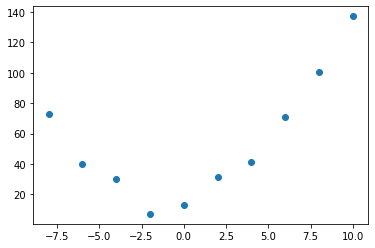

In [5]:
x = np.load('dataset2.npz')['x']
y = np.load('dataset2.npz')['y']
plt.scatter(x, y)
plt.show()

Fit a polynomial model (for the suggested degree) to the data. Comment on the fit (as a function of the model) in terms of the mean square error.

(Hint: Use in-built libraries from Scikit-learn for the exercise.)

### 7.2. Degree 1 (Linear)

3) Using linear regression, find a relation between $Y$ and $X$. Plot the regrssion function(vs $X$) and report the mean square error.

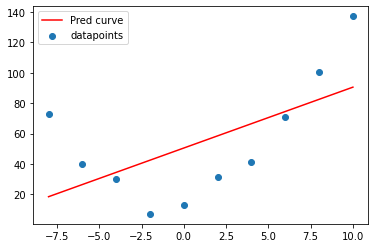

Mean Squared Error is: 977.1734445909718


In [6]:
sorted_zip = sorted(zip(x,y))
x, y = zip(*sorted_zip)
x, y = np.asarray(x), np.asarray(y)
x1 = x.reshape(-1, 1)
model = LinearRegression().fit(x1, y)
y_pred = model.predict(x1)
plt.plot(x, y_pred, 'r', label = 'Pred curve')
plt.scatter(x,y, label = 'datapoints')
plt.legend(loc='top left')
plt.show()
print('Mean Squared Error is:', mean_squared_error(y, y_pred))

### 7.3. Degree 2 (Quadratic)

3) Using polynomial regression of degree 2, Find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

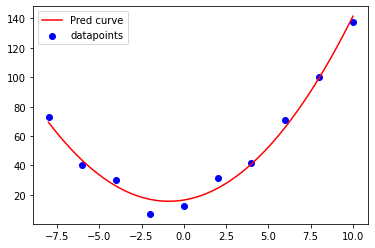

Mean Squared Error is: 24.846331727808177


In [7]:
poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x1) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y)

x1_new = np.linspace(np.min(x),np.max(x),1000000).reshape(1000000,1) #to smoothen the curve
x_poly_new = poly.fit_transform(x1_new) 
poly.fit(x_poly_new, y) 
plt.scatter(x1, y, color = 'blue', label = 'datapoints') 
plt.plot(x1_new, lin2.predict(poly.fit_transform(x1_new)), color = 'red', label = 'Pred curve') 
plt.legend(loc='top left')
plt.show()
print('Mean Squared Error is:', mean_squared_error(y, lin2.predict(poly.fit_transform(x1))))

### 7.4. Degree 3 (Cubic)

4) Using polynomial regression of degree 3, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error

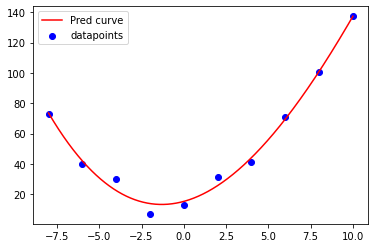

Mean Squared Error is: 16.26492228044507


In [8]:
poly = PolynomialFeatures(degree = 3) 
x_poly = poly.fit_transform(x1) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y)

x1_new = np.linspace(np.min(x),np.max(x),1000000).reshape(1000000,1) #to smoothen the curve
x_poly_new = poly.fit_transform(x1_new) 
poly.fit(x_poly_new, y) 
plt.scatter(x1, y, color = 'blue', label = 'datapoints') 
plt.plot(x1_new, lin2.predict(poly.fit_transform(x1_new)), color = 'red', label = 'Pred curve') 
plt.legend(loc='top left')
plt.show()
print('Mean Squared Error is:', mean_squared_error(y, lin2.predict(poly.fit_transform(x1))))

### 7.5. Degree 9

5) Using polynomial regression of degree 9, find a relation between $Y$ and $X$. Plot the regression function (vs $X$) and report the mean square error.

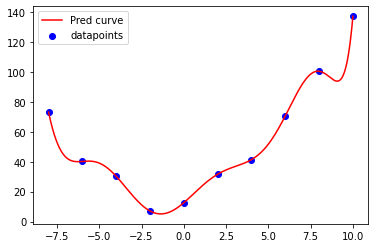

Mean Squared Error is: 6.116243629494975e-14


In [9]:
poly = PolynomialFeatures(degree = 9) 
x_poly = poly.fit_transform(x1) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y)

x1_new = np.linspace(np.min(x),np.max(x),1000000).reshape(1000000,1) #to smoothen the curve
x_poly_new = poly.fit_transform(x1_new) 
poly.fit(x_poly_new, y) 
plt.scatter(x1, y, color = 'blue', label = 'datapoints') 
plt.plot(x1_new, lin2.predict(poly.fit_transform(x1_new)), color = 'red', label = 'Pred curve') 
plt.legend(loc='top left')
plt.show()
print('Mean Squared Error is:', mean_squared_error(y, lin2.predict(poly.fit_transform(x1))))

### 7.6. Training Error

6) Plot the mean square error versus the degree of the polynomial fit (for degree = 0,1, ..., 9). Comment on the best model for the data based on MSE of training error

**Note** : Degree 0 means just the intercept

Text(0.5, 1.0, 'MSE vs Degree (Training Data)')

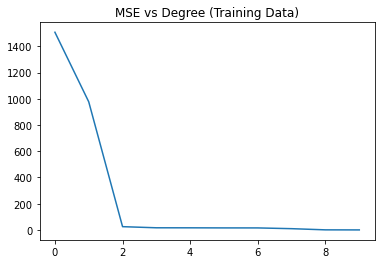

In [18]:
err = [0]*10
lin2 = LinearRegression()
for i in range(10):
    poly = PolynomialFeatures(degree = i) 
    x_poly = poly.fit_transform(x1) 
    poly.fit(x_poly, y) 
    lin2.fit(x_poly, y) 
    err[i] = mean_squared_error(y, lin2.predict(poly.fit_transform(x1)))

plt.plot(np.arange(10),err)
plt.title('MSE vs Degree (Training Data)')

From training data, we can conclude that degree **2** polynomial would be the best to use as its the elbow of the graph and the change in errors is less after which the error change is minimal'

### 7.7. Test error

Load **'dataset2_test.npz'**. The data points in the file are from the same distribution as the ones in 'dataset2.npz'.

7) Plot the mean square error by predicting outputs on the test dataset using the trained models of degrees 0,1,...9 obtained with the training data set **dataset2.npz**. Now, comment on the best model for data based on MSE on both training and test datasets.

(Hint: Plot Training error and Testing error in the same plot.) Use Matplotlib for plotting

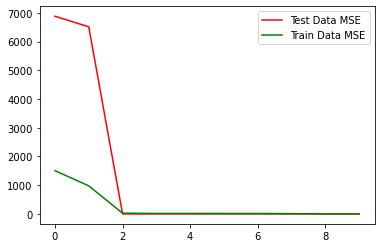

In [21]:
xt = np.load('dataset2_test.npz')['x']
yt = np.load('dataset2_test.npz')['y']
sorted_zip = sorted(zip(xt,yt))
xt, yt = zip(*sorted_zip)
xt, yt = np.asarray(xt), np.asarray(yt)
xt1 = xt.reshape(-1, 1)
err1 = [0]*10
lin2 = LinearRegression()
for i in range(10):
    poly = PolynomialFeatures(degree = i) 
    x_poly = poly.fit_transform(x1) 
    xt_poly = poly.fit_transform(xt1) 
    poly.fit(xt_poly, yt) 
    lin2.fit(xt_poly, yt) 
    err1[i] = mean_squared_error(yt, lin2.predict(xt_poly))

plt.plot(np.arange(10),err1, color = 'r', label = 'Test Data MSE')
plt.plot(np.arange(10),err, color = 'g', label = 'Train Data MSE')
plt.legend(loc='top right')
plt.show()

Both the graphs overlap to a very high extent

### 7.8. Best Degree of polynomial

8)Hint : Based on Test error.

From test data, we can conclude that degree **2** polynomial would be the best to use as its the elbow of the graph and the change in errors is less after which the error change is minimal'

# Section 8 : Multiple Linear Regression on Boston Housing Price Data
Import data from **"dataset3.csv"**. This is one among the sklearn standard datasets which can be used to develop a model for house price prediction "load_boston". Description of the features can be found in the sklearn documentation if you want to explore.

## 8.1. Describe the data
Hint :  Categorical features = ['RAD', 'CHAS', 'ZN'], Non-categorical features = Except categorical all the other features
1. Find Mean, Median for Non-categorical features and Price, Mode only for Categorical feaures
2. Find Quantiles at 25th, 50th, 75th for Non-categorical features and Price
3. Find Maximum and Minimum, Range of the data (max -min) for Non-categorical features and Price
4. Find Distributions (Histogram) for Non-categorical features and Price (Using Seaborn is suggested)

**Note** - Dont use pandas.describe here. You may use inbuilt functions from numpy package. You can store the above descriptive statistics in a dataframe and print that dataframe.

In [23]:
df = pd.read_csv('dataset3.csv')

df['RAD'] = df.RAD.astype('category')
df['CHAS'] = df.CHAS.astype('category')
df['ZN'] = df.ZN.astype('category')

df1 = pd.DataFrame(df, columns = ['RAD', 'CHAS', 'ZN'])
df2 = df.drop(['RAD', 'CHAS', 'ZN'], axis=1)
print('Mean of Non-categorical features and Price:\n',df2.mean(), '\n')
print('Median of Non-categorical features and Price:\n', df2.median(), '\n')
print('Mode of categorical features:\n', df1.mode())

Mean of Non-categorical features and Price:
 CRIM         3.613524
INDUS       11.136779
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
Price       22.532806
dtype: float64 

Median of Non-categorical features and Price:
 CRIM         0.25651
INDUS        9.69000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
Price       21.20000
dtype: float64 

Mode of categorical features:
     RAD CHAS   ZN
0  24.0  0.0  0.0


### Quantiles for the given data

In [24]:
print('25% Quantile:')
for column in df2:
    npcol = df2[column].to_numpy()
    print(column, ':', np.quantile(npcol, .25))
    
print('\n50% Quantile:')
for column in df2:
    npcol = df2[column].to_numpy()
    print(column, ':', np.quantile(npcol, .50))
    
print('\n75% Quantile:')
for column in df2:
    npcol = df2[column].to_numpy()
    print(column, ':', np.quantile(npcol, .75))

25% Quantile:
CRIM : 0.08204499999999999
INDUS : 5.19
NOX : 0.449
RM : 5.8855
AGE : 45.025
DIS : 2.100175
TAX : 279.0
PTRATIO : 17.4
B : 375.3775
LSTAT : 6.949999999999999
Price : 17.025

50% Quantile:
CRIM : 0.25651
INDUS : 9.69
NOX : 0.5379999999999999
RM : 6.208499999999999
AGE : 77.5
DIS : 3.2074499999999997
TAX : 330.0
PTRATIO : 19.05
B : 391.44
LSTAT : 11.36
Price : 21.2

75% Quantile:
CRIM : 3.6770825
INDUS : 18.1
NOX : 0.624
RM : 6.6235
AGE : 94.07499999999999
DIS : 5.1884250000000005
TAX : 666.0
PTRATIO : 20.2
B : 396.225
LSTAT : 16.955000000000002
Price : 25.0


### Max, Min, Range for the given data

In [25]:
for column in df2:
    npcol = df2[column].to_numpy()
    print(column, ':', 'Min=', min(npcol), 'Max=', max(npcol), 'Range=', max(npcol) - min(npcol))

CRIM : Min= 0.00632 Max= 88.9762 Range= 88.96988
INDUS : Min= 0.46 Max= 27.74 Range= 27.279999999999998
NOX : Min= 0.385 Max= 0.871 Range= 0.486
RM : Min= 3.5610000000000004 Max= 8.78 Range= 5.218999999999999
AGE : Min= 2.9 Max= 100.0 Range= 97.1
DIS : Min= 1.1296 Max= 12.1265 Range= 10.9969
TAX : Min= 187.0 Max= 711.0 Range= 524.0
PTRATIO : Min= 12.6 Max= 22.0 Range= 9.4
B : Min= 0.32 Max= 396.9 Range= 396.58
LSTAT : Min= 1.73 Max= 37.97 Range= 36.24
Price : Min= 5.0 Max= 50.0 Range= 45.0


In [26]:
des = df2.describe()
des.loc['Range of index'] = des.loc['max'] - des.loc['min']
des

,CRIM,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000
Range of index,88.969880,27.280000,0.486000,5.219000,97.100000,10.996900,524.000000,9.400000,396.580000,36.240000,45.000000


### Histograms

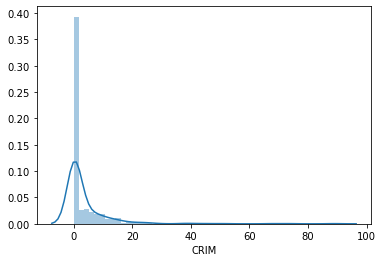

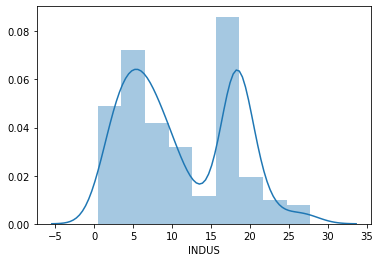

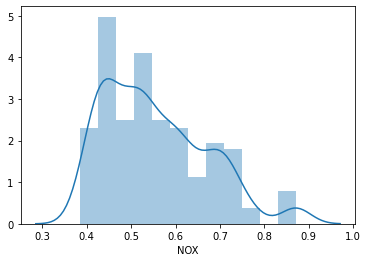

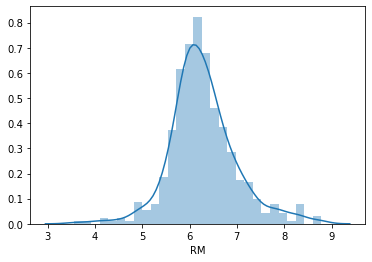

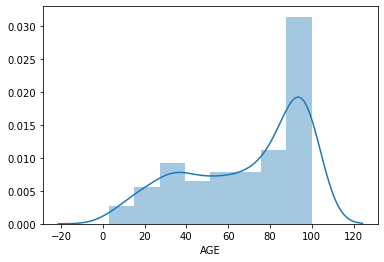

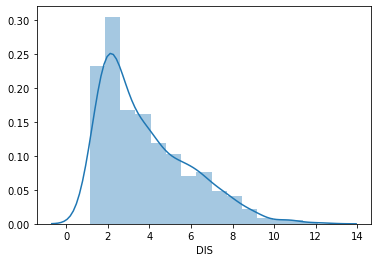

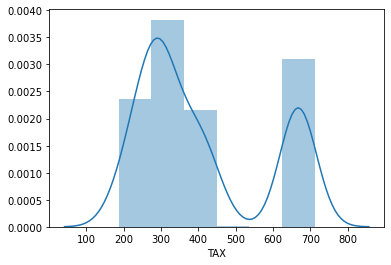

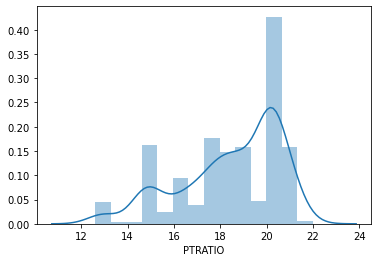

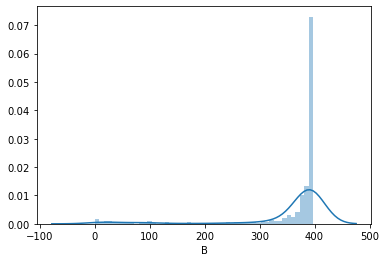

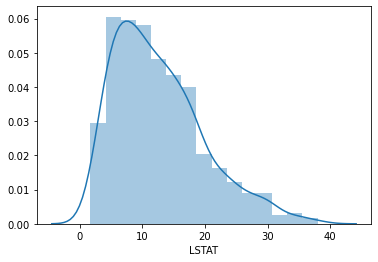

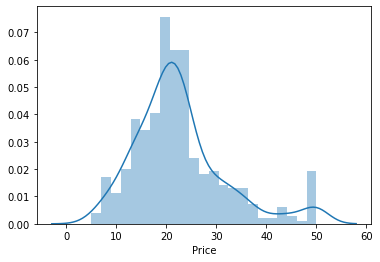

In [27]:
for column in df2:
    plt.figure()
    sns.distplot(df2[column])

## 8.2. Correlation Heatmap for all the features and target
**Hint** : Use Seaborn library to plot, note keep annotate = True

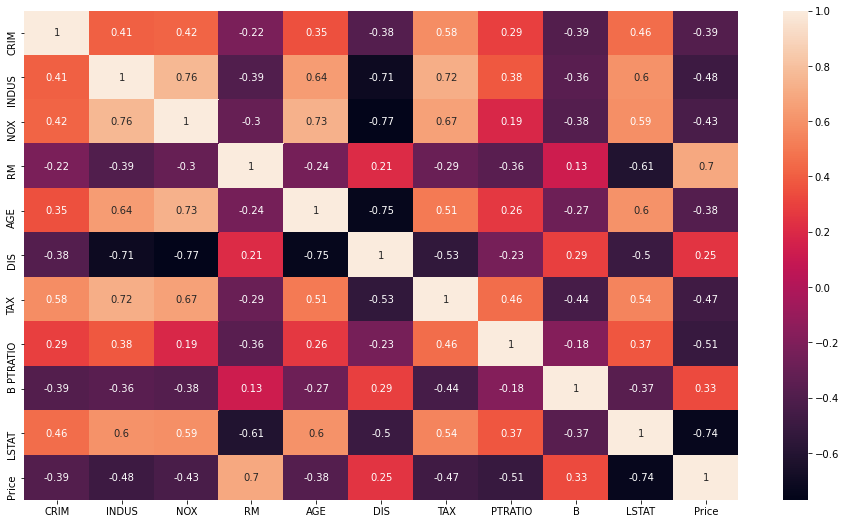

In [28]:
plt.figure(figsize = (16,9))
sns.heatmap(df.corr(), annot = True)

## 8.3. Highly Correlated features (cor>0.5)
Find and print the highly correlated features with respect to "Price". 

In [36]:
cor_target = abs(df.corr()["Price"])
relevant_features = cor_target[cor_target>=0.4]
relevant_features

INDUS      0.483725
NOX        0.427321
RM         0.695360
TAX        0.468536
PTRATIO    0.507787
LSTAT      0.737663
Price      1.000000
Name: Price, dtype: float64

## 8.4. Split the Dataset
**Hint** : Use sklearn train_test_split to split the data into train and test data, keep random state = 2020 and test_size = 0.33

In [30]:
from sklearn.model_selection import train_test_split
X = df.drop(["Price"], axis = 1)
Y = df['Price']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=2020)

## 8.5. Train the model on only train data using linear_regression
Report Train MSE

In [31]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
y_train_predict = lin_model.predict(X_train)
print('MSE for Train Data:', mean_squared_error(Y_train, y_train_predict))

MSE for Train Data: 22.166423224150183


## 8.6. Predict Outputs for Test Data
Report test MSE

In [32]:
lin_model = LinearRegression()
lin_model.fit(X_test, Y_test)
y_test_predict = lin_model.predict(X_test)
print('MSE for Test Data:', mean_squared_error(Y_test, y_test_predict))

MSE for Test Data: 20.079782237717858


## 8.7. Important Features
Find and print the featuers in order of their importance based on trained regression model.

Feature: 0, CRIM, Score: -0.08846
Feature: 1, ZN, Score: 0.05120
Feature: 2, INDUS, Score: 0.03876
Feature: 3, CHAS, Score: 1.35639
Feature: 4, NOX, Score: -23.63411
Feature: 5, RM, Score: 2.66387
Feature: 6, AGE, Score: 0.02632
Feature: 7, DIS, Score: -1.63506
Feature: 8, RAD, Score: 0.33377
Feature: 9, TAX, Score: -0.01562
Feature: 10, PTRATIO, Score: -1.12336
Feature: 11, B, Score: 0.00793
Feature: 12, LSTAT, Score: -0.58520


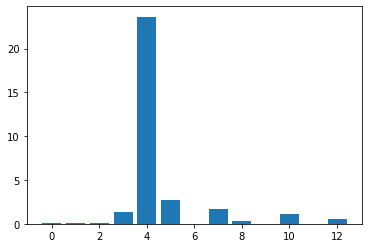

In [37]:
importance = lin_model.coef_
col = list(df.columns[:-1])
j=0
for i,v in enumerate(importance):
    print('Feature: %0d, %s, Score: %0.5f' % (i,col[j], v))
    j+=1
# plot feature importance
plt.bar([x for x in range(len(importance))], abs(importance))
plt.show()

'NOX' has the highest importance of all the features mentioned

# Q&A Section :
1. Comment on assumptions validity discussed in Section 7 with this dataset? Whether we satisfied assumptions or not.
2. Is there any relation between highly important features(from Section 8.7) and highly correlated features with price?Only give descriptive observation.
3. Why usually test error is higher than training error?
4. Will Analytical solution discussed in the Notebook 1 Section 2 be valid on this dataset? Why or Why not?

R2 score for the model: 0.9835234577540966


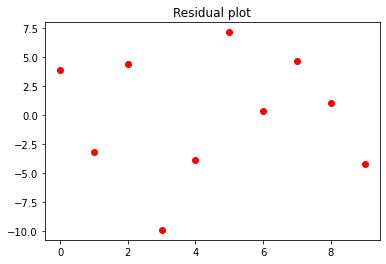

Number of samples in data: 10
Rank of data matrix: 3


In [48]:
from sklearn.metrics import r2_score

x = np.load("./dataset2.npz")["x"]
y = np.load("./dataset2.npz")["y"]
sorted_zip = sorted(zip(x,y))
x, y = zip(*sorted_zip)
x, y = np.asarray(x), np.asarray(y)
x1 = x.reshape(-1, 1)

poly = PolynomialFeatures(degree = 2)
x_poly = poly.fit_transform(x1) 
lin2 = LinearRegression() 
lin2.fit(x_poly, y)
poly.fit(x_poly, y) 
y_pred = lin2.predict(poly.fit_transform(x1))


print("R2 score for the model:", (r2_score(y, y_pred)))

# Homoskedasticity check
residuals = y - y_pred
plt.scatter([i for i in range(len(y_pred))], residuals, color = 'r')
plt.title("Residual plot")
plt.show()

# Correlation between examples
print("Number of samples in data:", x.shape[0])
print("Rank of data matrix:", np.linalg.matrix_rank(x_poly_new))

**Answers**

1. Following are the comments:

    1. **Linear relationship between features and target**. R2 score of the model is 0.98352 which tells that the model fits the data well and the features are linearly related with target (Price, here). 
    2. **Homoskedasticty**: Residuals lie in the same range(roughly) for all input values. We can conclude that Homoskedasticty is followed to a large extent (outliers can be the last 2)
    3. **Independence**: Rank of the matrix is 3 which tells there can be at most 3 independent samples. Thus, all samples are not independent of each other.
    4. **No multi-collinearity among features**: From the heatmap before, multiple variables are correlated and thus cross-correlation exists


2. The variables which have larger absolute value of coefficient have higher influence on the model and in turn higher importance. From our observations, we saw that **INDUS, NOX, RM, TAX, PTRATIO, LSTAT** had high correlation values wrt **Price**. This high correlation is also shown in the values of coefficient. The variables with high correlation have higher influence on the model through coefficient. Even though its not a direct relation, we can conclude that correlation does play a role in the importance of the variable.


3. The model that we create using training data tries its best to fit the curve for the training data and reduce the error in predicted values. At this point, the testing data doesn't have any influence in creation of model. So, based on the homogeneity of distribution of the testing and training data, we can have higher or lower difference in error. If the homogeneity in data distribution is maintained, both training and test data will have similar error %. If not, then the difference between the two is higher. Sometimes, we get test error higher because the test data is more offset from the predicted curve than the training data.


4. The analytical solution discussed before will be valid for the given 'Boston Housing' dataset. Analytical method is essentially derived from the MSE minimization method. The only places where the analytical method fails is where the overall number of variables is higher than the number of datapoints. But, Analytical method is **not the most appropriate choice**. Model contains 13 features, which means computing the matrix inverse will be relatively expensive. Categorical values will be treated as numerical values (continuous) which is not accurate.